In [14]:

# USAGE
# python detect_mask_image.py --image examples/example_01.png

# import the necessary packages
#from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
#from tensorflow.keras.preprocessing.image import img_to_array
#from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
import argparse
import cv2
import os
from keras_facenet import FaceNet
import pickle
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from google.colab.patches import cv2_imshow
import cv2

# construct the argument parser and parse the argumen#ts
#ap = argparse.ArgumentParser()
##ap.add_argument("-i", "--image", required=True,
	##help="path to input image")
#ap.add_argument("-f", "--face", type=str,
#	default="face_detector",
#	help="path to face detector model directory")
#ap.add_argument("-m", "--model", type=str,
#	default="mask_detector.model",
#	help="path to trained face mask detector model")
#ap.add_argument("-c", "--confidence", type=float, default=0.5,
#	help="minimum probability to filter weak detections")
#args = vars(ap.parse_args())


#load facenet models
print("[INFO] loading face detector model...")
face_detect_model=FaceNet()

#load mask classifier models
print("[INFO] loading face mask detector model...")
#model = load_model(args["model"])
model = pickle.load(open('/content/drive/MyDrive/project2/models/svm_keral_classifier_final_model.sav', 'rb'))

embed_list_test=[]
face_box_list=[]
face_confidence_list=[]

# load the input image from disk
image = '/content/drive/MyDrive/project2/Input/test/without_mask/93.jpg'
img=cv2.imread('/content/drive/MyDrive/project2/Input/test/without_mask/93.jpg')
faces_array_train = face_detect_model.extract(image, threshold=0.95)
for j in range(len(faces_array_train)):
    face_embed_dict=faces_array_train[j]
    face_embed=face_embed_dict['embedding']
    face_confidence=face_embed_dict['confidence']
    face_box=face_embed_dict['box']
    embed_list_test.append(face_embed)
    face_box_list.append(face_box)
    face_confidence_list.append(face_confidence)

face=np.array(embed_list_test)
#for i in range(len(face)):
label_pred = model.predict(face)
proba = model.predict_proba(face)
if label_pred == 0:
    label = "Mask"
else:
    label= "No Mask"

if label=='Mask':
  proba= proba[0][0]
else:
  proba=proba[0][1]

color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
print(face_box_list)
X=face_box_list[0][0]
Y=face_box_list[0][1]
w=face_box_list[0][2]
h=face_box_list[0][3]
(X, Y) = max(0, X), max(0, Y)
endX = max(w - 1, X+w)
endY= max(h - 1, Y+h)
#include the probability in the label
label = "{}: {:.2f}%".format(label, proba * 100)
#print(label)
cv2.putText(img, label, (X, Y - 10),
cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
cv2.rectangle(img, (X, Y), (endX, endY), color, 2)

# show the output image
cv2_imshow(img)
cv2.waitKey(0)

ModuleNotFoundError: No module named 'google.colab'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install keras-facenet

     |████████████████████████████████| 2.3MB 5.1MB/s 
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-cp37-none-any.whl size=10386 sha256=f00f8059f0498ba3cbd2df6ab9ceb005d9fa163ff13d93e79ccaf211c40665b1
  Stored in directory: /root/.cache/pip/wheels/f6/53/9a/36c4b52fd22faf4f710d5047d874655b85a1b2cf77accfb9bd
Successfully built keras-facenet


In [ ]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


In [4]:
!pip install scikit-learn==0.24.2

     |████████████████████████████████| 22.3MB 128kB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


[INFO] loading face detector model...
[INFO] loading face mask detector model...
No Mask: 99.73%


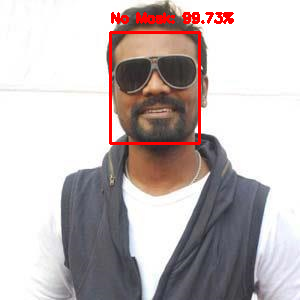

In [6]:

# USAGE
# python detect_mask_image.py --image examples/example_01.png

# import the necessary packages
import tensorflow as tf
import numpy as np
import argparse
import cv2
import os
from keras_facenet import FaceNet
import pickle
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from google.colab.patches import cv2_imshow


# construct the argument parser and parse the argumen#ts
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True,
	#help="path to input image")
#ap.add_argument("-f", "--face", type=str,
#	default="face_detector",
#	help="path to face detector model directory")
#ap.add_argument("-m", "--model", type=str,
	#default="mask_detector.model",
	#help="path to trained face mask detector model")
#ap.add_argument("-c", "--confidence", type=float, default=0.5,
#	help="minimum probability to filter weak detections")
#args = vars(ap.parse_args())

def pred_mask(image):
  img=cv2.imread(image)
  faces_array_train = face_detect_model.extract(image, threshold=0.95)
  for j in range(len(faces_array_train)):
      face_embed_dict=faces_array_train[j]
      face_embed=face_embed_dict['embedding']
      face_confidence=face_embed_dict['confidence']
      face_box=face_embed_dict['box']
      embed_list_test.append(face_embed)
      face_box_list.append(face_box)
      face_confidence_list.append(face_confidence)
  #print(face_box_list)

  face=np.array(embed_list_test)
  #print(len(face))
  k=0
  label_list=[]
  proba_list=[]
  box_list=[]
  for i in face:
    #print(len(i))
    i=i.reshape(1,-1)
    #print(len(i))
    label_pred = model.predict(i)
    proba = model.predict_proba(i)
    if label_pred == 0:
        label = "Mask"
    else:
        label= "No Mask"

    if label=='Mask':
      proba= proba[0][0]
    else:
      proba=proba[0][1]

    #color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
    #print(face_box_list)
    box=face_box_list[k]
    box_list.append(box)
    label_list.append(label)
    proba_list.append(proba)
    k=k+1
    #Y=face_box_list[k][0][1]
    #w=face_box_list]k][0][2]
    #h=face_box_list[k][0][3]
    #(X, Y) = max(0, X), max(0, Y)
    #endX = max(w - 1, X+w)
    #endY= max(h - 1, Y+h)
    #include the probability in the label
    #label = "{}: {:.2f}%".format(label, proba * 100)
    #print(label)
  #ret_list=[]
  #ret_list.append(box_list)
  #ret_list.append(label_list)
  #ret_list.append(proba_list)
  return img,box_list,label_list,proba_list

if __name__ == "__main__":
  #load facenet models
  print("[INFO] loading face detector model...")
  face_detect_model=FaceNet()

  #load mask classifier models
  print("[INFO] loading face mask detector model...")
  #model = load_model(args["model"])
  model = pickle.load(open('/content/drive/MyDrive/project2/models/svm_keral_classifier_final_model.sav', 'rb'))

  embed_list_test=[]
  face_box_list=[]
  face_confidence_list=[]

  # load the input image from disk
  image = '/content/drive/MyDrive/project2/Input/test/without_mask/116.jpg'
  
  img,box_list,label_list,proba_list=pred_mask(image)
  #print(result)
  k=0
  #print(len(label_list))
  for i in range(len(label_list)):
    #print(result[k])
    #print(i)
    #print(box_list)
    box=box_list[i]
    #print(box)
    label=label_list[i]
    #print(label)
    proba=proba_list[i]
    #print(proba)
    color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
    #print(box)
    X=box[0]
    Y=box[1]
    w=box[2]
    h=box[3]
    (X, Y) = max(0, X), max(0, Y)
    endX = max(w - 1, X+w)
    endY= max(h - 1, Y+h)
    #if label=='Mask':
    #  proba= proba[0][0]
    #else:
    #  proba=proba[0][1]
    #include the probability in the label
    label = "{}: {:.2f}%".format(label, proba * 100)
    print(label)
    cv2.putText(img, label, (X, Y - 10),
    cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
    cv2.rectangle(img, (X, Y), (endX, endY), color, 2)
    k=k+1

  # show the output image
  cv2_imshow(img)
  cv2.waitKey(0)

In [11]:
# USAGE
# python detect_mask_image.py --image examples/example_01.png

# import the necessary packages
import tensorflow as tf
import numpy as np
import argparse
import cv2
import os
from keras_facenet import FaceNet
import pickle
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
#from google.colab.patches import cv2_imshow
import cv2
#from imutils.video import VideoStream
import time
import imutils


def pred_mask(image):
  faces_array_train = face_detect_model.extract(image, threshold=0.95)
  for j in range(len(faces_array_train)):
      face_embed_dict=faces_array_train[j]
      face_embed=face_embed_dict['embedding']
      face_confidence=face_embed_dict['confidence']
      face_box=face_embed_dict['box']
      embed_list_test.append(face_embed)
      face_box_list.append(face_box)
      face_confidence_list.append(face_confidence)

  face=np.array(embed_list_test)
  k=0
  label_list=[]
  proba_list=[]
  box_list=[]
  for i in face:
    i=i.reshape(1,-1)
    label_pred = model.predict(i)
    proba = model.predict_proba(i)
    if label_pred == 0:
        label = "Mask"
    else:
        label= "No Mask"

    if label=='Mask':
      proba= proba[0][0]
    else:
      proba=proba[0][1]

    box=face_box_list[k]
    box_list.append(box)
    label_list.append(label)
    proba_list.append(proba)
    k=k+1

  return image,box_list,label_list,proba_list

if __name__ == "__main__":
  #load facenet models
  print("[INFO] loading face detector model...")
  face_detect_model=FaceNet()

  #load mask classifier models
  print("[INFO] loading face mask detector model...")
  #model = load_model(args["model"])
  model = pickle.load(open('/d/project2/models/svm_keral_classifier_final_model.sav', 'rb'))

  embed_list_test=[]
  face_box_list=[]
  face_confidence_list=[]

  # load the input image from disk
  #image = '/content/drive/MyDrive/project2/Input/test/without_mask/116.jpg'

  # initialize the video stream and allow the camera sensor to warm up
  print("[INFO] starting video stream...")
  #vs = VideoStream(src=0).start()
  cap = cv2.VideoCapture(0)
  #time.sleep(2.0)
  cap.set(3,640)#width
  cap.set(4,480)#height
  cap.set(10,100)#brightness  
  
  # loop over the frames from the video stream
  while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    print(frame)
    if ret:
      assert not isinstance(frame,type(None)), 'frame not found'

    frame = imutils.resize(frame,width=400)
    img,box_list,label_list,proba_list=pred_mask(frame)
    k=0
    for i in range(len(label_list)):
      box=box_list[i]
      label=label_list[i]
      proba=proba_list[i]
      color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
      X=box[0]
      Y=box[1]
      w=box[2]
      h=box[3]
      (X, Y) = max(0, X), max(0, Y)
      endX = max(w - 1, X+w)
      endY= max(h - 1, Y+h)
      label = "{}: {:.2f}%".format(label, proba * 100)
      print(label)
      cv2.putText(img, label, (X, Y - 10),
      cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
      cv2.rectangle(img, (X, Y), (endX, endY), color, 2)
      k=k+1

      # show the output image
      cv2.imshow(' ',img)
      cv2.waitKey(0)
      key = cv2.waitKey(1) & 0xFF
      if key == ord("q"):
        break
# do a bit of cleanup
cv2.destroyAllWindows()
cap.release()  

[INFO] loading face detector model...
[INFO] loading face mask detector model...
[INFO] starting video stream...
Mask: 72.90%


In [9]:
!pip install imutils